### Problem Statement: Using dataset of employee attrition predict whether employee will Quit  or Not.
### Link: https://www.kaggle.com/datasets/aryashah2k/datasets-in-hr-analytics-applied-ai/code
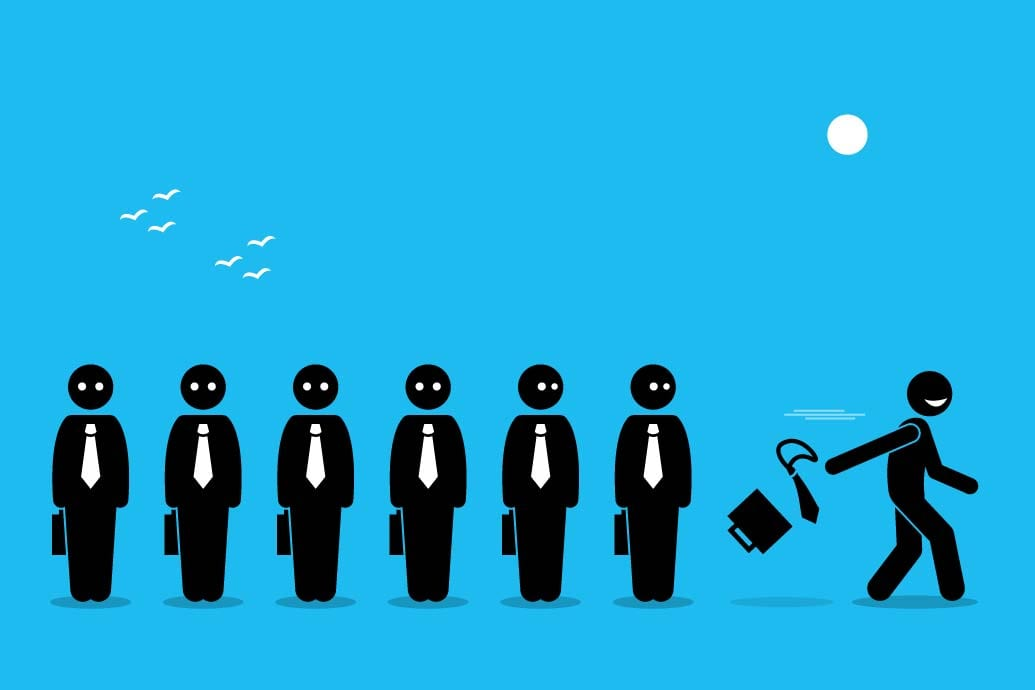

#### What is Employee Attrition?
Employee attrition, especially those of key and star employees is a major concern for an HR organization. When employees leave, it has many side effects. There is loss of organizational and product-specific expertise, loss of productivity due to new hires taking time to onboard. Sometimes employees have great relationships with customers, and that is hard to rebuild. There are also hiring costs and training costs associated. Employees leave due to various reasons.

#### Our goal is to build an ML model to predict attrition so that HR can take preventive action that is needed.


### About The Dataset
The dataset contains feature attributes that could possibly impact an employee's decision to leave the organization.

The first column is employee ID.

The second column is the total months of experience that the employee has overall.

Total orgs worked is the total number of organizations the employee has worked so far.

Months in org is the total number of months the employee has worked in this organization.

Last pay increment band is a scale of one to five with one being the highest. The higher the band, the higher the pay raise for the employee in the last increment cycle.

Next comes average feedback based on the feedback the employee got in performance reviews. Again, it's a scale of one to five, with one being the highest rating.

Last promotion years represent the total number of years since the last promotion for the employee.

Finally, we have the target variable attrition, which indicates if the employee left the organization or not. This is only a representational data set. For your organization, you should do enough research to include all kinds of data that may possibly influence an employee's decision.

### Reading and Understanding the Data

In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading dataset
df = pd.read_csv("C:/Users/Abhinay hinge/Downloads/employee_attrition.csv")
df.shape

(1000, 8)

In [3]:
# To display top 5 rows of dataset
df.head()

,EmployeeID,TotalMonthsOfExp,TotalOrgsWorked,MonthsInOrg,LastPayIncrementBand,AverageFeedback,LastPromotionYears,Attrition
0,1,110,4,9,5,4,4,1
1,2,103,3,51,1,4,2,0
2,3,41,4,16,5,4,4,1
3,4,32,4,17,5,2,3,0
4,5,80,3,16,3,4,2,0


In [4]:
# To display columns
df.columns

Index(['EmployeeID', 'TotalMonthsOfExp', 'TotalOrgsWorked', 'MonthsInOrg',
       'LastPayIncrementBand', 'AverageFeedback', 'LastPromotionYears',
       'Attrition'],
      dtype='object')

In [5]:
# Attrition yes or no
df.Attrition.value_counts()

0    770
1    230
Name: Attrition, dtype: int64

Here 0 stands for Employee not left job

and 1 stands for employee left job

out of 1000 employees 230 employees left the job

In [218]:
# In percentage of total 
df.Attrition.value_counts(normalize=True)*100

0    77.0
1    23.0
Name: Attrition, dtype: float64

23% employees left the job

In [219]:
# Display information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   EmployeeID            1000 non-null   int64
 1   TotalMonthsOfExp      1000 non-null   int64
 2   TotalOrgsWorked       1000 non-null   int64
 3   MonthsInOrg           1000 non-null   int64
 4   LastPayIncrementBand  1000 non-null   int64
 5   AverageFeedback       1000 non-null   int64
 6   LastPromotionYears    1000 non-null   int64
 7   Attrition             1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


SyntaxError: invalid syntax (<ipython-input-26-b0c081c09de5>, line 1)

In [220]:
cols = [ 'LastPayIncrementBand','AverageFeedback','LastPromotionYears','Attrition']
for c in cols:
    print(df[c].value_counts(),"\n")
    print(df[c].value_counts(normalize=True)*100)
    print("="*70)

4    222
5    206
3    192
1    191
2    189
Name: LastPayIncrementBand, dtype: int64 

4    22.2
5    20.6
3    19.2
1    19.1
2    18.9
Name: LastPayIncrementBand, dtype: float64
4    276
1    253
3    240
2    231
Name: AverageFeedback, dtype: int64 

4    27.6
1    25.3
3    24.0
2    23.1
Name: AverageFeedback, dtype: float64
2    266
1    255
3    249
4    230
Name: LastPromotionYears, dtype: int64 

2    26.6
1    25.5
3    24.9
4    23.0
Name: LastPromotionYears, dtype: float64
0    770
1    230
Name: Attrition, dtype: int64 

0    77.0
1    23.0
Name: Attrition, dtype: float64


### Data Cleaning

In [221]:
# Check whether null values are present or not
df.isna().sum()

EmployeeID              0
TotalMonthsOfExp        0
TotalOrgsWorked         0
MonthsInOrg             0
LastPayIncrementBand    0
AverageFeedback         0
LastPromotionYears      0
Attrition               0
dtype: int64

There are no null values in dataset

In [222]:
df.drop(['EmployeeID'], axis=1, inplace=True)
df.head()

,TotalMonthsOfExp,TotalOrgsWorked,MonthsInOrg,LastPayIncrementBand,AverageFeedback,LastPromotionYears,Attrition
0,110,4,9,5,4,4,1
1,103,3,51,1,4,2,0
2,41,4,16,5,4,4,1
3,32,4,17,5,2,3,0
4,80,3,16,3,4,2,0


### Exploratory Data Analysis Visualization

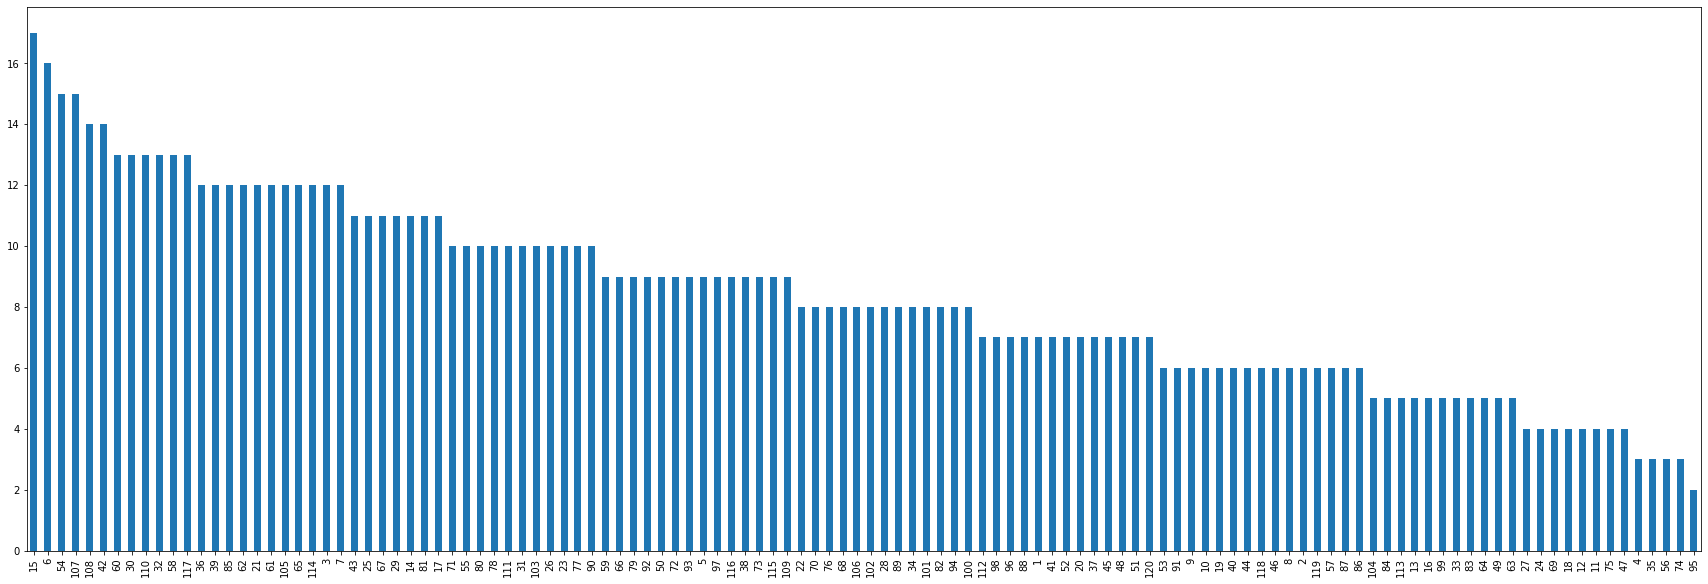

In [223]:
# Plotting graph of total month of experience
df['TotalMonthsOfExp'].value_counts().plot.bar(figsize = (30,10))
plt.show()

Most of the employees have 15 months of total experience

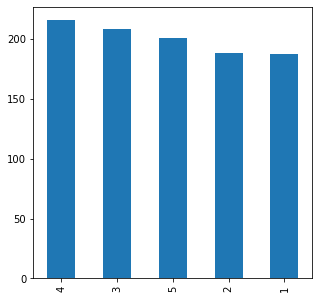

In [224]:
# Graph of employees worked in total organizations
df['TotalOrgsWorked'].value_counts().plot.bar(figsize = (5,5))
plt.show()

Most of the employees worked in 3 to 4 companies

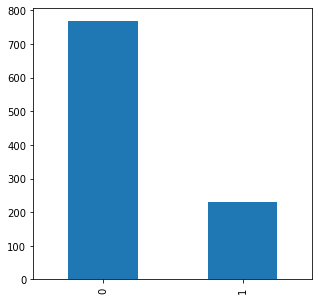

In [225]:
# Graph of attrition
df['Attrition'].value_counts().plot.bar(figsize = (5,5))
plt.show()

Attrition column is highly imbalanced as no of employees left job are less compared to no of employees not left job

In [226]:
df.corr()

,TotalMonthsOfExp,TotalOrgsWorked,MonthsInOrg,LastPayIncrementBand,AverageFeedback,LastPromotionYears,Attrition
TotalMonthsOfExp,1.000000,0.053769,0.667504,-0.012453,-0.038315,0.007059,0.019702
TotalOrgsWorked,0.053769,1.000000,0.027159,-0.003307,0.001763,-0.041774,0.008706
MonthsInOrg,0.667504,0.027159,1.000000,-0.017984,-0.013334,0.009309,0.012605
LastPayIncrementBand,-0.012453,-0.003307,-0.017984,1.000000,-0.017317,0.094561,0.108528
AverageFeedback,-0.038315,0.001763,-0.013334,-0.017317,1.000000,-0.002145,-0.008253
LastPromotionYears,0.007059,-0.041774,0.009309,0.094561,-0.002145,1.000000,0.765641
Attrition,0.019702,0.008706,0.012605,0.108528,-0.008253,0.765641,1.000000


It gives correlation value of columns from this table we can see that correlation value of Attribution and last promotion years are very high compared to other values

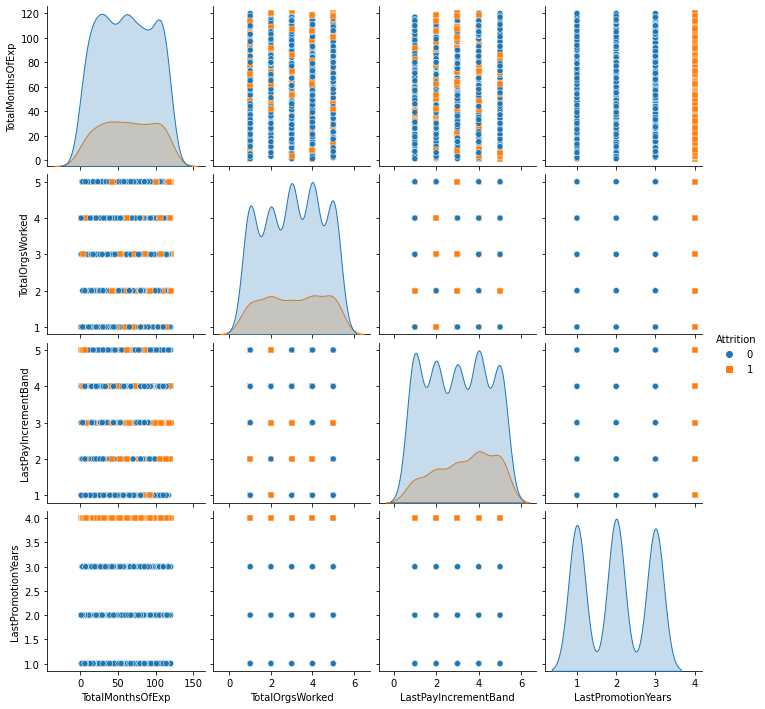

In [227]:
# Construct the pairplot
sns.pairplot(df[["TotalMonthsOfExp","TotalOrgsWorked","LastPayIncrementBand","LastPromotionYears","Attrition"]], vars=["TotalMonthsOfExp","TotalOrgsWorked","LastPayIncrementBand","LastPromotionYears"], 
             hue='Attrition', markers=['o','s'])
plt.show()

From pairplot we can see that all people with scale of 4 for last promotion year left the job

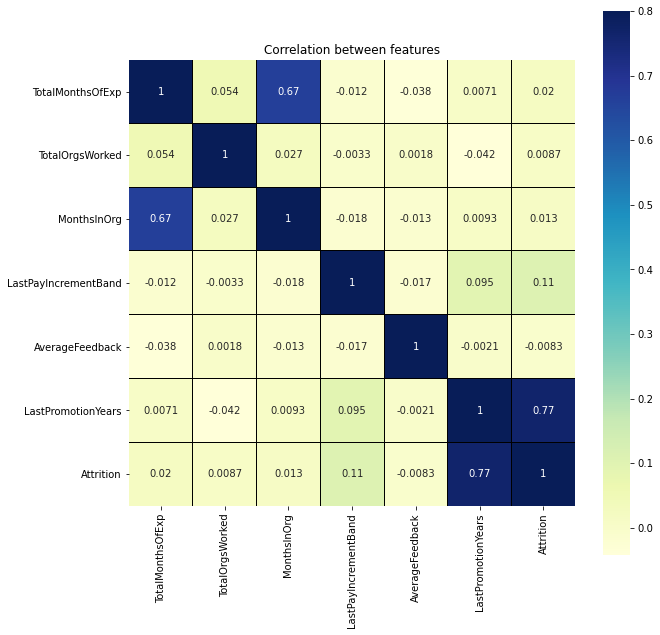

In [228]:
# Display the correlation into heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, linecolor='black', cmap='YlGnBu')
plt.title("Correlation between features")
plt.show()

From the heatmap of correlation we can see that last promotion years and Last pay incremental band have high correlation with attrition

### Assign values to X and y

In [229]:
# Display top 5 rows of dataset
df.head()

,TotalMonthsOfExp,TotalOrgsWorked,MonthsInOrg,LastPayIncrementBand,AverageFeedback,LastPromotionYears,Attrition
0,110,4,9,5,4,4,1
1,103,3,51,1,4,2,0
2,41,4,16,5,4,4,1
3,32,4,17,5,2,3,0
4,80,3,16,3,4,2,0


In [324]:
# Contains Values of all columns except Attrition, MonthsInOrg and AverageFeedback
X = df.drop(['Attrition','MonthsInOrg','AverageFeedback'],axis=1)
X.head()

,TotalMonthsOfExp,TotalOrgsWorked,LastPayIncrementBand,LastPromotionYears
0,110,4,5,4
1,103,3,1,2
2,41,4,5,4
3,32,4,5,3
4,80,3,3,2


In [325]:
# Contains values of Attrition column
y = df.Attrition
y

0      1
1      0
2      1
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    1
Name: Attrition, Length: 1000, dtype: int64

In [326]:
# Shape of the dataset i.e. no of rows and columns
df.shape

(1000, 7)

### Train-test split

In [356]:
# Applying Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [357]:
# To get shape of train and test values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [358]:
df.head()

,TotalMonthsOfExp,TotalOrgsWorked,MonthsInOrg,LastPayIncrementBand,AverageFeedback,LastPromotionYears,Attrition
0,110,4,9,5,4,4,1
1,103,3,51,1,4,2,0
2,41,4,16,5,4,4,1
3,32,4,17,5,2,3,0
4,80,3,16,3,4,2,0


### Scaling

In [359]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['TotalMonthsOfExp']] = sc.fit_transform(X_train[['TotalMonthsOfExp']])
X_test[['TotalMonthsOfExp']] = sc.transform(X_test[['TotalMonthsOfExp']])

In [360]:
X_train.head()

,TotalMonthsOfExp,TotalOrgsWorked,LastPayIncrementBand,LastPromotionYears
382,-0.403087,4,5,3
994,-1.560654,5,1,1
982,-0.895053,1,2,2
47,-1.531715,1,2,2
521,-1.068688,3,1,2


In [361]:
X_test.head()

,TotalMonthsOfExp,TotalOrgsWorked,LastPayIncrementBand,LastPromotionYears
507,0.985994,4,2,4
818,1.188568,5,4,1
452,0.146758,4,3,4
368,-1.618532,5,4,2
242,0.725541,1,4,4


### ML algorithm logistic regression 

In [362]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [363]:
logreg

LogisticRegression()

In [364]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [365]:
# Table of actual and predicted values on train data
pd.DataFrame(zip(y_train, y_pred_train), columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
795,0,0
796,0,0
797,0,0
798,0,0


In [366]:
# Table of actual and predicted values on test data
pd.DataFrame(zip(y_test, y_pred_test), columns=['Actual','Predicted'])

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
195,1,1
196,0,0
197,1,1
198,1,1


In [367]:
# To display accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

In [368]:
# Accuracy on train data
accuracy_score(y_train, y_pred_train)

1.0

Model is 100% accurate on train data

In [369]:
# Accuracy on test data
accuracy_score(y_test, y_pred_test)

1.0

Model is 100% accurate on test data that means predicted values are 100% correct

In [370]:
confusion_matrix(y_test, y_pred_test)

array([[154,   0],
       [  0,  46]], dtype=int64)

Out of total observations of test data predicted value for not left job are 154 and left job are 46

In [371]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
cm

,0,1
0,154,0
1,0,46


In [372]:
cm.index = ['Actual Not left job', 'Actual left job']
cm.columns = ['Predicted not left job', 'Predicted left job']
cm

,Predicted not left job,Predicted left job
Actual Not left job,154,0
Actual left job,0,46


In [373]:
# To calculate precision, recall and f1-score import package
from sklearn.metrics import precision_score, recall_score, f1_score

In [374]:
# Value for precision is
precision_score(y_test, y_pred_test)

1.0

In [375]:
# Value for recall is
recall_score(y_test, y_pred_test)

1.0

In [376]:
# Value for f1-score is
f1_score(y_test, y_pred_test)

1.0

All values for precision, recall and f1-score are 100% accurate

### Applying decision tree classifier

In [299]:
# Modeling

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [300]:
y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

In [301]:
# Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [302]:
accuracy_score(y_train, y_pred_train)

1.0

Accuracy score for decision tree is also 100%

In [303]:
accuracy_score(y_test,y_pred_test)

1.0

In [304]:
accuracy_score(y_test,y_pred_test)

1.0

Accuracy score for both train and test data is 100%

In [305]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00        46

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



No need for gridsearchcv as model is not overfitting

### Observations:

From the exploratory data analysis we get to know which are the most important columns for predicting the attrition.

We get to know correlation of different columns with attrition and the highest correlation we found was last promotion years which is 0.77 and is one of the most important column to predict whether the employee quit or not quit the job.
 
### Conclusion: 

As in both, algorithm model shows 100% accuracy means the predictions made by model are correct.

Model is highly accurate with all values of precision, recall, f1-score as 100%. Model is good to go for predicting employees who will quit or not quit the job.

HR can take the prevention actions for the employees whose last promotion years are more in numbers as most of the employees left the job due to last promotion year.